## **<center><font style="color:rgb(100,109,254)">Digital Image Processing</font> </center>**
### **<center><font style="color:rgb(100,109,254)">Lab 04</font> </center>**

### **<center><font style="color:rgb(100,109,254)">Image Preprocessing (Edge Detection)</font> </center>**

****

### **<font style="color:rgb(255,0,255)">01. Extracting Colors Channel </font>**

Read the image and extract its color channel as 
* grayscale image
* color images

Then display the images to verify the operations has succeeded.


In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
path = "C:\\Users\\hp\\Google Drive\\Fiverr Work\\2022\\33. Computer Vision Course\\pictures"

Text(0.5, 1.0, 'Orignal Image')

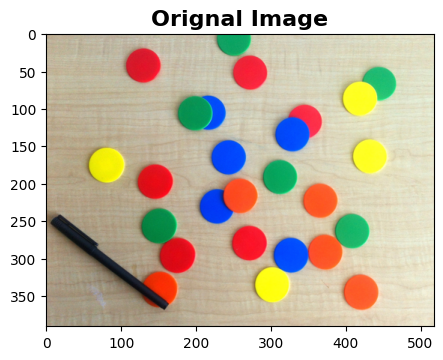

In [3]:
img = cv2.imread(path+"\\coloredChips.png")  # took path and name of image as an argument

RGBImage = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(RGBImage)
plt.title("Orignal Image", fontsize = 16, fontweight = 'bold')



#### Get grayscale image of each channel

In [4]:
def getGrayscaleImages(image):

    b = image[:,:,0]
    g = image[:,:,1]
    r = image[:,:,2]

    return b, g, r

#### Get Colored Image of each channel (First Method)

In [5]:
import numpy as np

def colorChannelImages(image):

    dimension = image.shape
    height, width = dimension[0], dimension[1]

    zeroChannel = np.zeros((height, width), "uint8")

    b, g, r = getGrayscaleImages(image)

    blueImage = cv2.merge([b, zeroChannel, zeroChannel])
    greenImage = cv2.merge([zeroChannel, g, zeroChannel])
    redImage = cv2.merge([zeroChannel, zeroChannel, r])

    return blueImage, greenImage, redImage

(400, 200, 3)


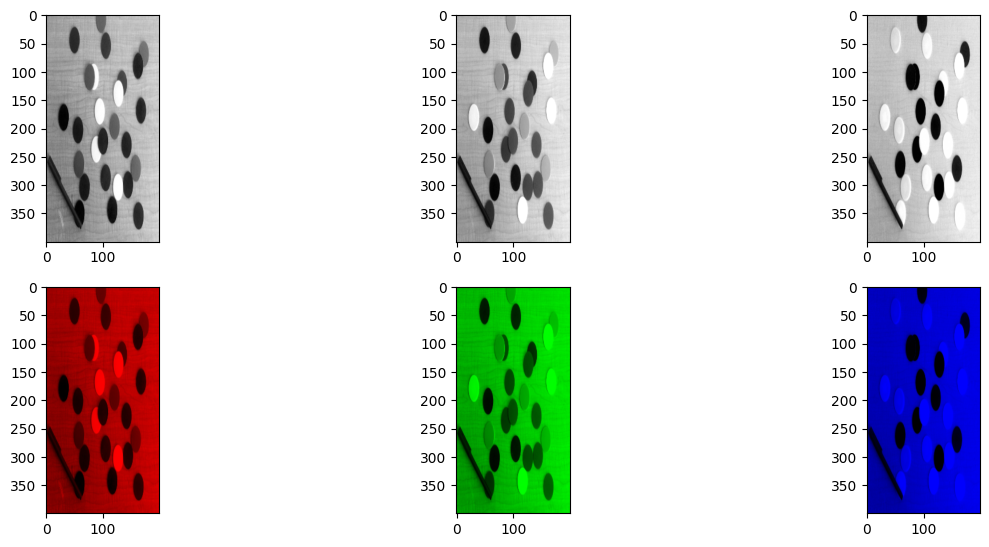

In [6]:
path = "C:\\Users\\hp\\Google Drive\\Fiverr Work\\2022\\33. Computer Vision Course\\pictures"

img = cv2.imread(path+"\\coloredChips.png")
imgResized = cv2.resize(img, (200, 400))

print(imgResized.shape)

b, g, r = getGrayscaleImages(imgResized)
blue, green, red = colorChannelImages(imgResized)

plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
plt.imshow(b, cmap="gray")
plt.subplot(3,3,2)
plt.imshow(g, cmap="gray")
plt.subplot(3,3,3)
plt.imshow(r, cmap="gray")
plt.subplot(3,3,4)
plt.imshow(blue, cmap="gray")
plt.subplot(3,3,5)
plt.imshow(green, cmap="gray")
plt.subplot(3,3,6)
plt.imshow(red, cmap="gray")


In [7]:
grayscalResult = np.hstack((b, g, r))
colorResult = np.hstack((blue, green, red))

# cv2.imshow("image", imgResized)
cv2.imshow("grayScale channel Images", grayscalResult)
cv2.imshow("color channel Images", colorResult)

cv2.waitKey()
cv2.destroyAllWindows()

#### Simple method to Extract the channel

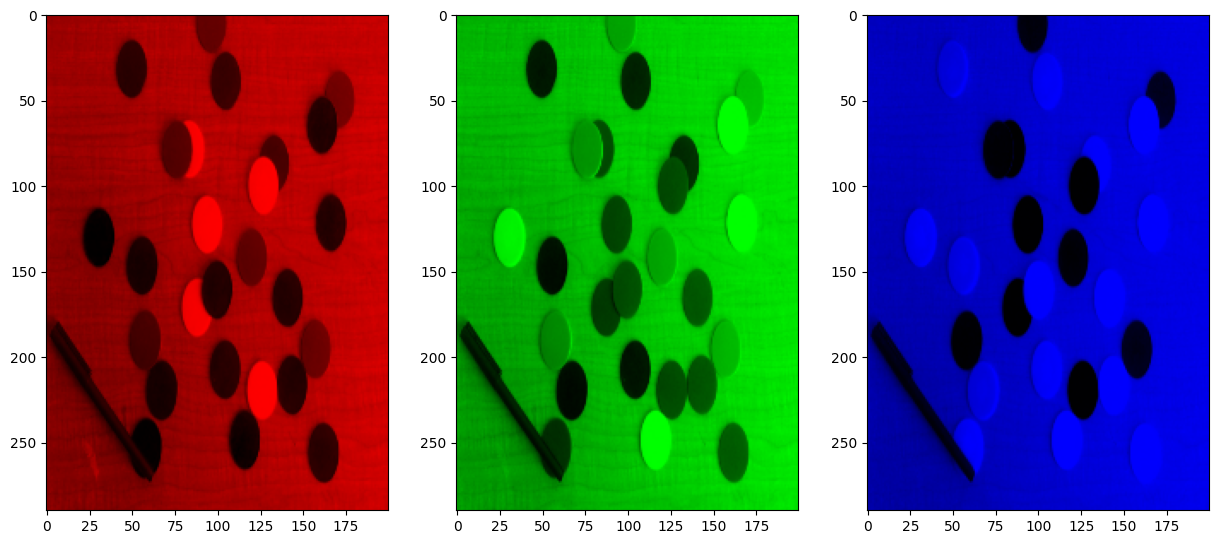

In [8]:
import cv2

path = "C:\\Users\\hp\\Google Drive\\Fiverr Work\\2022\\33. Computer Vision Course\\pictures"

image = cv2.imread(path+"\\coloredChips.png")
# image = cv2.imread(colorStripe)#pass correct object
image =cv2.resize(image, (200,290))
bw,gw,rw=cv2.split(image)#pass correct object

b = image.copy()
# set green and red channels to 0
b[:,:,1] = 0
b[:,:,2] = 0
g = image.copy()
# set blue and red channels to 0
g[:,:,0] = 0
g[:,:,2] = 0
r = image.copy()
# set blue and green channels to 0
r[:,:,0] = 0
r[:,:,1] = 0

plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(b, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(g, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(r, cmap="gray")


In [9]:
# RGB - Blue
cv2.imshow('B-RGB', b)
cv2.imshow('BW B-RGB', bw)
# RGB - Green
cv2.imshow('G-RGB', g)
cv2.imshow('Gw-RGB', gw)
# RGB - Red
cv2.imshow('R-RGB', r)
cv2.imshow('w-RGB', rw)

cv2.waitKey(0)
cv2.destroyAllWindows()

### **<center><font style="color:rgb(255,0,0)">Before Executing the part 02 of this plab you have to Open Countoring_01.ipynb file and uderstand how we find the contours in an image!</font></center>**


### **<font style="color:rgb(255,0,255)">02. Image Preprocessing for Edge Detection </font>**

To detect objects in an image a common approach is to find the contours of the objects against the image background. The contours are referred to as edges in image processing, to find these edges a number of pre-processing steps can be done to an image to get better edge detection. Do the following steps to the image piece05.png.
* Convert it to grayscale 
* Blur the gray image using Gaussian Blur to reduce the noise in the image
* Use canny to find the edges 
* Dilate the edges to fill in small gaps that might appear when using canny
* Now use the findContors on the diluted image, How many objects can you find?

# Simple

4


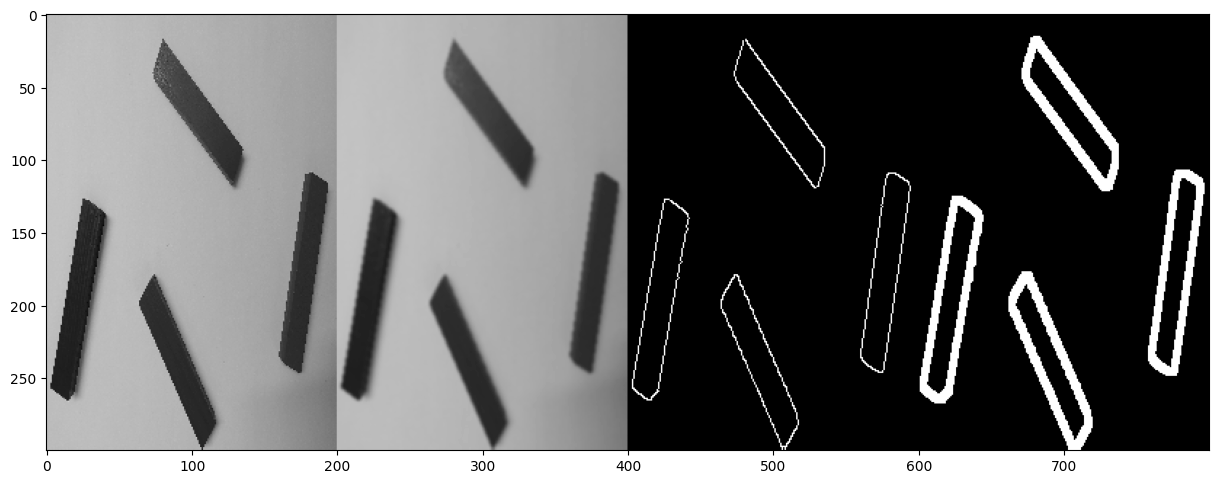

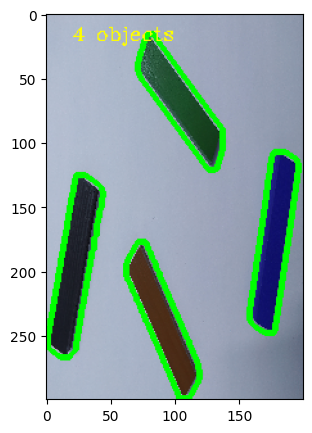

In [10]:
import cv2 as cv
import numpy as np

path ="C:\\Users\\hp\\Google Drive\\Fiverr Work\\2022\\15. Teaching OpenCV to Client\\Pics+scripts\\Pictures"

img = cv.imread(path + "\\piece05.png")
imgResized = cv.resize(img, (200, 300))

kernel = np.ones((5,5), "uint8")

imgGray = cv.cvtColor(imgResized, cv.COLOR_BGR2GRAY)

blurImg = cv.GaussianBlur(imgGray, (5,5), 0)

cannyImge = cv.Canny(blurImg, 10, 150)

imgDilation = cv.dilate(cannyImge, kernel, iterations=1)

contours, hierarchy = cv.findContours(imgDilation, 
    cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

print(len(contours))


cv.drawContours(imgResized, contours, -1, (0, 255, 0), 3)
cv.putText(imgResized, str(len(contours))+" objects", (20, 20), cv.FONT_HERSHEY_COMPLEX,
            0.5, (255, 255, 0), 1)

result = np.hstack((imgGray, blurImg, cannyImge, imgDilation))

plt.figure(figsize=(15,10))
plt.imshow(result, cmap="gray")

plt.figure(figsize=(5,5))
plt.imshow(imgResized, cmap="gray")

# cv.imshow("image", imgResized)
# cv.imshow("output", result)

# cv.waitKey()
# cv.destroyAllWindows()

# With trackbar

In [11]:

# Exercise 05: Preparing Image for edge detection

import cv2 as cv
import numpy as np

def nothing(x):
    pass

path ="C:\\Users\\hp\\Google Drive\\Fiverr Work\\2022\\15. Teaching OpenCV to Client\\Pics+scripts\\Pictures"

cv.namedWindow("output")

cv.createTrackbar("kernel1", "output", 0, 55, nothing)
cv.createTrackbar("kernel2", "output", 0, 55, nothing)
cv.createTrackbar("cannyLower", "output", 3, 255, nothing)
cv.createTrackbar("cannyUpper", "output", 255, 255, nothing)

while True:

    kernel1 = cv.getTrackbarPos("kernel1", "output")
    kernel2 = cv.getTrackbarPos("kernel2", "output")
    cannyLower = cv.getTrackbarPos("cannyLower", "output")
    cannyUpper = cv.getTrackbarPos("cannyUpper", "output")

    img = cv.imread(path + "\\piece05.png")
    imgResized = cv.resize(img, (200, 300))

    # # for dilation
    dilateKernel = np.ones((5,5), "uint8")

    imgGray = cv.cvtColor(imgResized, cv.COLOR_BGR2GRAY)
    
    # As kernel is size of odd dimension
    if (kernel1*kernel2)%2 == 1:
        dilateKernel = np.ones((kernel1,kernel2), "uint8")
        blurImg = cv.GaussianBlur(imgGray, (kernel1,kernel2), 0)
    else:
        blurImg = cv.GaussianBlur(imgGray, (3,3), 0)

    cannyImge = cv.Canny(blurImg, cannyLower, cannyUpper)

    imgDilation = cv.dilate(cannyImge, dilateKernel, iterations=1)

    contours, hierarchy = cv.findContours(imgDilation, 
        cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

    print(len(contours))

    cv.drawContours(imgResized, contours, -1, (0, 255, 0), 3)
    cv.putText(imgResized, str(len(contours))+" objects", (20, 20), cv.FONT_HERSHEY_COMPLEX,
                0.5, (255, 255, 0), 1)

    result = np.hstack((imgGray, blurImg, cannyImge, imgDilation))

    cv.imshow("image", imgResized)
    cv.imshow("output", result)

    k = cv.waitKey(1)

    if k == ord("q"):
        cv.destroyAllWindows()

4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'output' in function 'cvGetTrackbarPos'


In [13]:
cv.destroyAllWindows()

*************